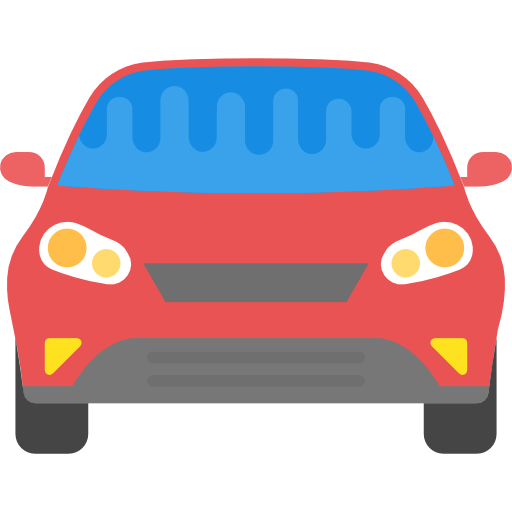
# Car Price Prediction Project
### by Evangelos Giakoumakis

<div>Icons made by <a href="https://www.flaticon.com/authors/vectors-market" title="Vectors Market">Vectors Market</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>

### Project Workflow

 1. Problem Statement
 2. Data Acquisition
 3. Data Exploration 
 4. Feature Engineering
 5. Model Development
 6. Model Explainability


### Problem Statement

Using the source data from the car market, build a system identifying the attributes most important to include when pricing a given vehicle model.

library installs

In [1]:
#! pip install pandas_profiling
#! pip install catboost
#! pip install shap
#! pip install sweetviz

library imports

In [2]:
import os
import pandas as pd
import numpy as np
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
import sweetviz as sv

from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor 
from sklearn.metrics import mean_squared_error, r2_score
import shap

pd.set_option('display.max_columns', None)
sns.set(color_codes=True)
%matplotlib inline

### Data Acquisition - Data Loading

In [3]:
data = pd.read_csv("MarketData.txt", sep="\t", header=(0))
data.shape

(475673, 16)

check import to pandas dataframe

In [4]:
data.head()

,POSTALCODE,STATE,MODELYEAR,MAKE,MODEL,TRIM,ENGINEDISPLACEMENT,ENGINECYLINDERCOUNT,TRANSMISSIONTYPE,DRIVETRAINTYPE,EXTERIORBASECOLOR,INTERIORMATERIAL,BODYTYPE,BODYCABSTYLE,ODOMETER,LISTPRICE
0,30655,GA,2016,Ford,Aerostar,NaN,3.7,6.0,Automatic,RWD,White,Vinyl,Cutaway Van,NaN,87970.0,29991.0
1,46124,IN,2016,Ford,Aerostar,NaN,3.0,6.0,Automatic,RWD,White,NaN,Minivan/Van,NaN,109470.0,25990.0
2,1453,MA,2013,Ford,C-Max Energi,SEL,2.0,4.0,CVT,FWD,Silver,Leather,Hatchback,NaN,56000.0,8900.0
3,1453,MA,2013,Ford,C-Max Energi,SEL,2.0,4.0,CVT,FWD,Green,Leather,Hatchback,NaN,81778.0,12999.0
4,1581,MA,2013,Ford,C-Max Energi,SEL,2.0,4.0,CVT,FWD,Gray,Leather,Hatchback,NaN,79566.0,10998.0


generate pandas profiling report

In [5]:
profile = ProfileReport(data, title='Car Price Prediction Report', explorative=True)
profile.to_file("CPP_EDA.html")

generate sweetviz report

In [6]:
sv_report = sv.analyze(data)
sv_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Exploratory Data Analysis

check data types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475673 entries, 0 to 475672
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   POSTALCODE           475673 non-null  int64  
 1   STATE                475673 non-null  object 
 2   MODELYEAR            475673 non-null  int64  
 3   MAKE                 475673 non-null  object 
 4   MODEL                475673 non-null  object 
 5   TRIM                 460718 non-null  object 
 6   ENGINEDISPLACEMENT   475242 non-null  float64
 7   ENGINECYLINDERCOUNT  475306 non-null  float64
 8   TRANSMISSIONTYPE     469343 non-null  object 
 9   DRIVETRAINTYPE       475588 non-null  object 
 10  EXTERIORBASECOLOR    446253 non-null  object 
 11  INTERIORMATERIAL     333486 non-null  object 
 12  BODYTYPE             475623 non-null  object 
 13  BODYCABSTYLE         160333 non-null  object 
 14  ODOMETER             468721 non-null  float64
 15  LISTPRICE        

In [8]:
data.describe()

,POSTALCODE,MODELYEAR,ENGINEDISPLACEMENT,ENGINECYLINDERCOUNT,ODOMETER,LISTPRICE
count,475673.000000,475673.000000,475242.000000,475306.000000,468721.000000,4.315840e+05
mean,51400.147124,2016.030101,3.110341,5.449142,60952.483763,2.284968e+04
std,26831.579502,1.636204,1.390882,1.489567,38840.941384,1.225894e+04
min,601.000000,2013.000000,1.000000,3.000000,1.000000,7.810000e+02
25%,30097.000000,2015.000000,2.000000,4.000000,31490.000000,1.449500e+04
50%,48838.000000,2017.000000,2.700000,6.000000,51890.000000,1.994300e+04
75%,75751.000000,2017.000000,3.500000,6.000000,83964.000000,2.970000e+04
max,99929.000000,2018.000000,6.800000,10.000000,394967.000000,1.690400e+06


In [9]:
#POSTALCODE

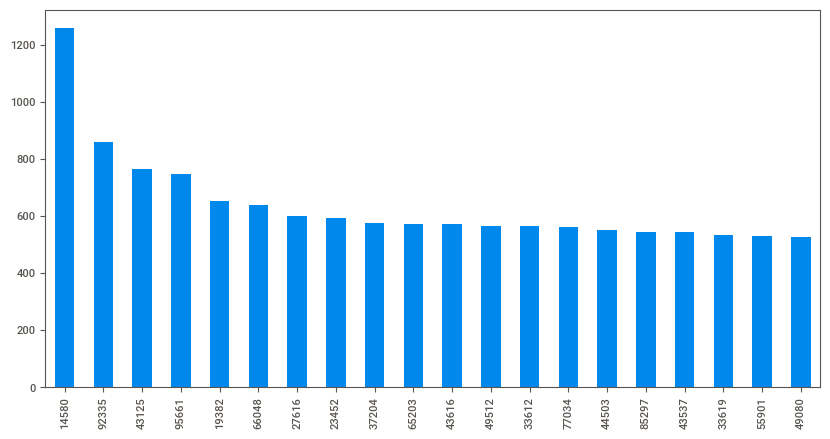

In [10]:
data.POSTALCODE.value_counts().head(20).plot(kind='bar', figsize=(10,5))

Most vehicles were registered in Monroe County, New York

In [11]:
data.POSTALCODE.nunique()

10017

In [12]:
data.POSTALCODE.unique()

array([30655, 46124,  1453, ..., 94102, 24015, 53201], dtype=int64)

In [13]:
# ToDo: plot US map with markers of vehicles purchased

In [14]:
#STATE

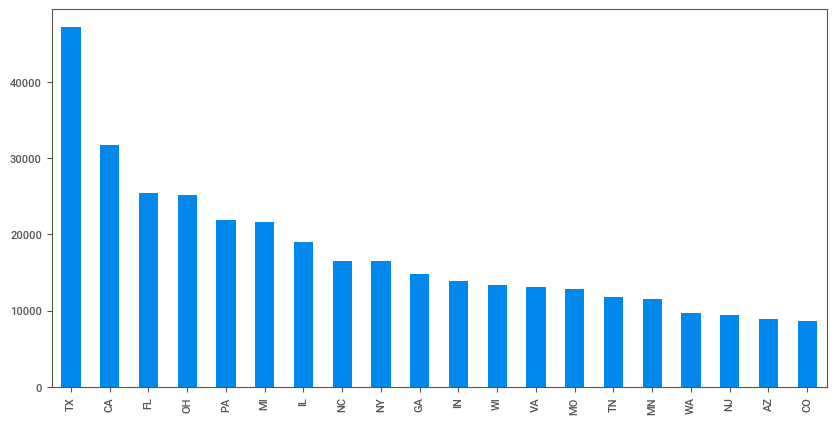

In [15]:
data.STATE.value_counts().head(20).plot(kind='bar', figsize=(10,5))

Most vehicles were registered in Texas followed by California

In [16]:
data.STATE.nunique()

53

In [17]:
data.STATE.unique()

array(['GA', 'IN', 'MA', 'ME', 'CT', 'NJ', 'NY', 'PA', 'DE', 'VA', 'MD',
       'NC', 'SC', 'FL', 'AL', 'TN', 'KY', 'OH', 'MI', 'IA', 'WI', 'MN',
       'SD', 'MT', 'IL', 'MO', 'KS', 'NE', 'OK', 'TX', 'CO', 'ID', 'UT',
       'AZ', 'NV', 'CA', 'OR', 'WA', 'AK', 'VT', 'NM', 'NH', 'MS', 'AR',
       'RI', 'HI', 'WV', 'ND', 'LA', 'WY', 'PR', 'GU', 'DC'], dtype=object)

In [18]:
#MODELYEAR

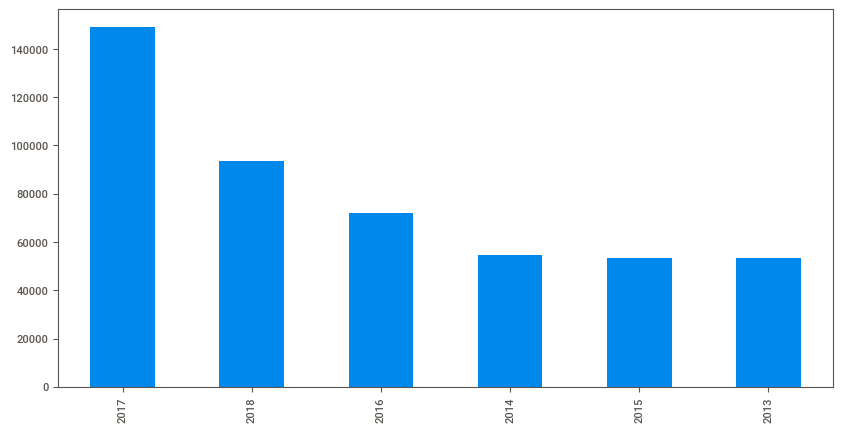

In [19]:
data.MODELYEAR.value_counts().plot(kind='bar', figsize=(10,5))

We can see that we have vehicles from years: 2013-2018.

Most vehicles in this dataset were of year 2017

In [20]:
#MAKE

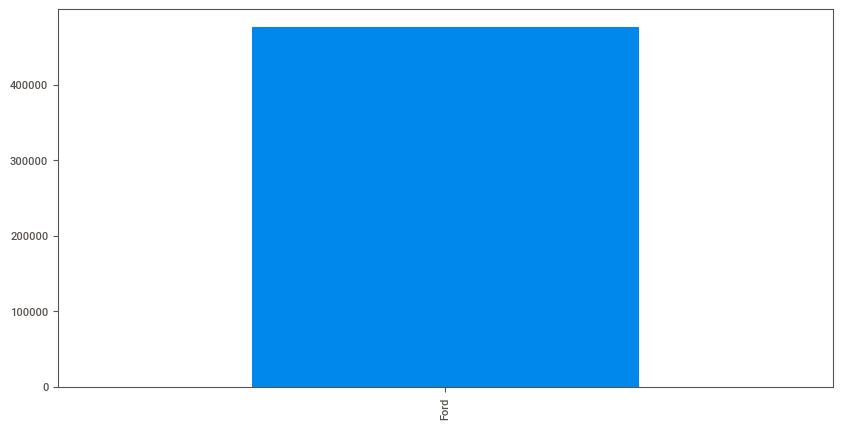

In [21]:
data.MAKE.value_counts().plot(kind='bar', figsize=(10,5))

We can remove this feature as it is a constant and wont bring any value to our model 

In [22]:
#MODEL

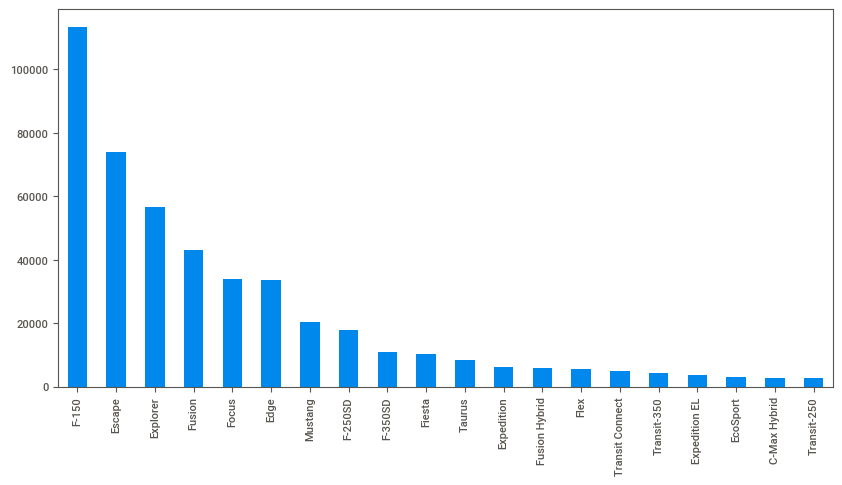

In [23]:
data.MODEL.value_counts().head(20).plot(kind='bar', figsize=(10,5))

As we can see most Ford vehicles sold were F-150's followed by Escape's and Explorer's

In [24]:
data.MODEL.nunique()

41

In [25]:
data.MODEL.unique()

array(['Aerostar', 'C-Max Energi', 'C-Max Hybrid', 'E-150', 'E-250',
       'E-350SD', 'E-450SD', 'EcoSport', 'Edge', 'Escape', 'Expedition',
       'Expedition EL', 'Expedition Max', 'Explorer', 'F-150', 'F-250SD',
       'F-350SD', 'F-450SD', 'F-550SD', 'F-59 Commercial', 'F-650SD',
       'F-750SD', 'Fiesta', 'Flex', 'Focus', 'Focus Electric', 'Fusion',
       'Fusion Energi', 'Fusion Hybrid', 'GT', 'Mustang', 'Ranger',
       'Sedan Police Interceptor', 'Stripped Chassis', 'Taurus', 'Tempo',
       'Transit Connect', 'Transit-150', 'Transit-250', 'Transit-350',
       'Utility Police Interceptor'], dtype=object)

In [26]:
#TRIM

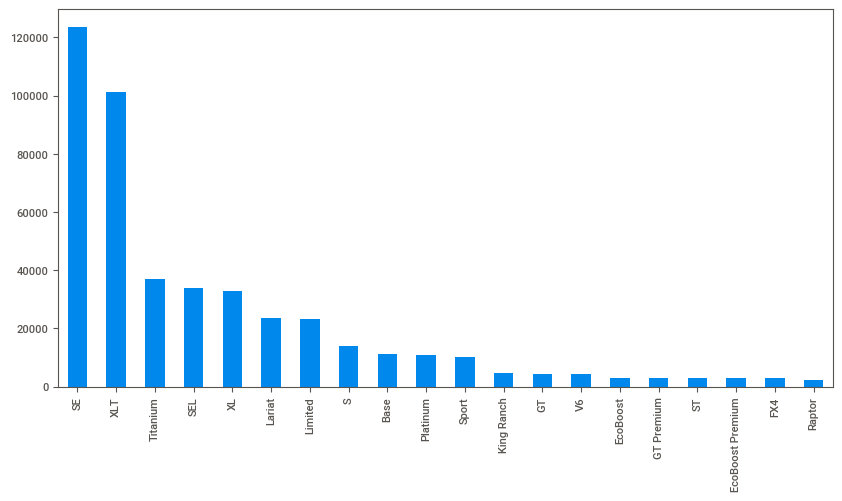

In [27]:
data.TRIM.value_counts().head(20).plot(kind='bar', figsize=(10,5))

Most Trims sold were SE's, XLT's and Titanium's

In [28]:
# ToDo: combine Trim with Model to create a stronger and more relevant feature

In [29]:
data.TRIM.nunique()

39

In [30]:
data.TRIM.unique()

array([nan, 'SEL', 'SE', 'Titanium', 'Commercial', 'XL', 'XLT', 'RV',
       'Base', 'S', 'SES', 'Limited', 'Sport', 'King Ranch', 'Platinum',
       'STX', 'FX4', 'Lariat', 'SVT Raptor', 'FX2', 'Raptor', 'ST', 'RS',
       'SE Luxury', 'V6', 'Boss 302', 'Shelby GT500', 'GT', 'GT Premium',
       'V6 Premium', '500', 'EcoBoost Premium', 'EcoBoost',
       'GT 50 Years Limited Edition', 'Shelby GT350', 'Shelby',
       'SRT Hellcat', 'SHO', 'L', 'XLT Premium'], dtype=object)

In [31]:
#ENGINEDISPLACEMENT

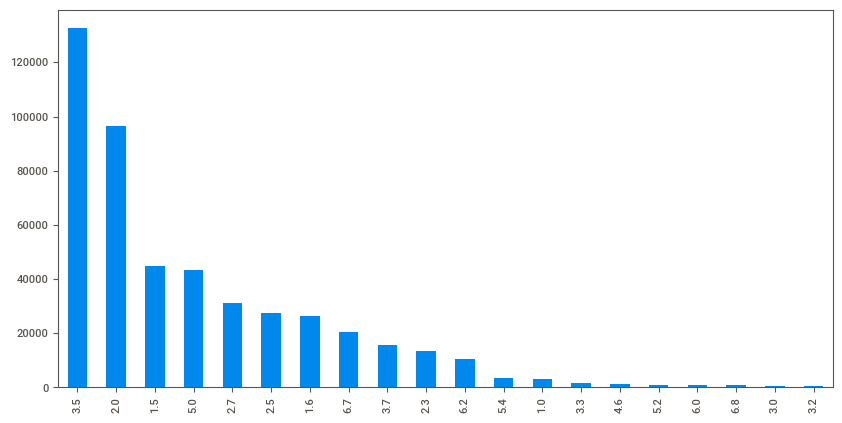

In [32]:
data.ENGINEDISPLACEMENT.value_counts().head(20).plot(kind='bar', figsize=(10,5))

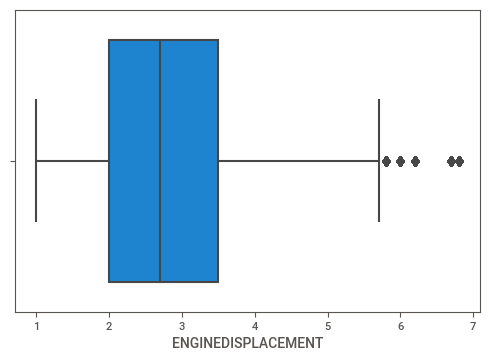

In [33]:
sns.boxplot(x=data.ENGINEDISPLACEMENT)

In [34]:
data.ENGINEDISPLACEMENT.nunique()

22

In [35]:
data.ENGINEDISPLACEMENT.unique()

array([3.7, 3. , 2. , nan, 4.6, 5.4, 5.7, 6.8, 6. , 1. , 3.5, 2.7, 1.6,
       2.5, 1.5, 2.3, 5. , 6.2, 3.3, 6.7, 5.8, 5.2, 3.2])

In [36]:
#ENGINECYLINDERCOUNT

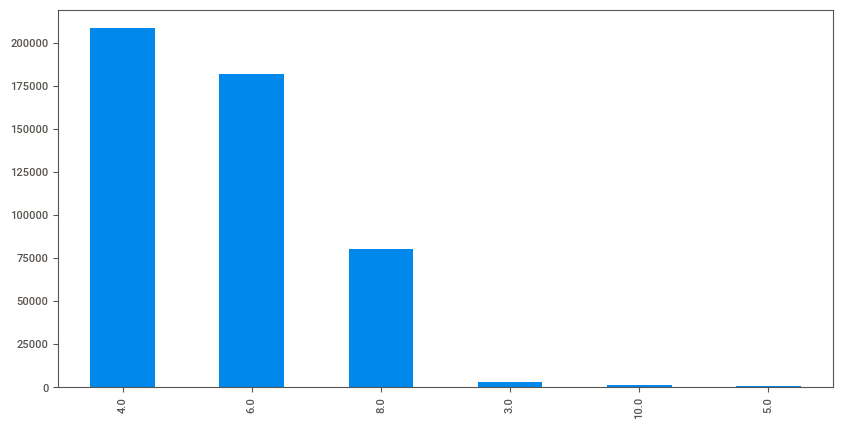

In [37]:
data.ENGINECYLINDERCOUNT.value_counts().plot(kind='bar', figsize=(10,5))

Most vehicles had 4 Cylinder engines followed by 6 Cylinders

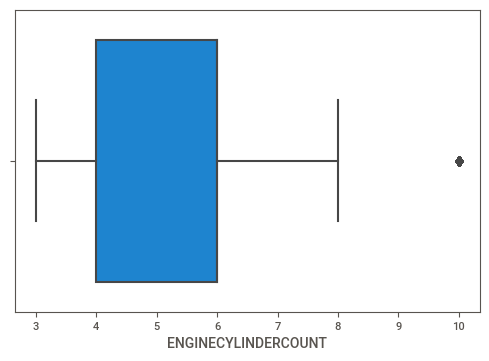

In [38]:
sns.boxplot(x=data.ENGINECYLINDERCOUNT)

In [39]:
#TRANSMISSIONTYPE

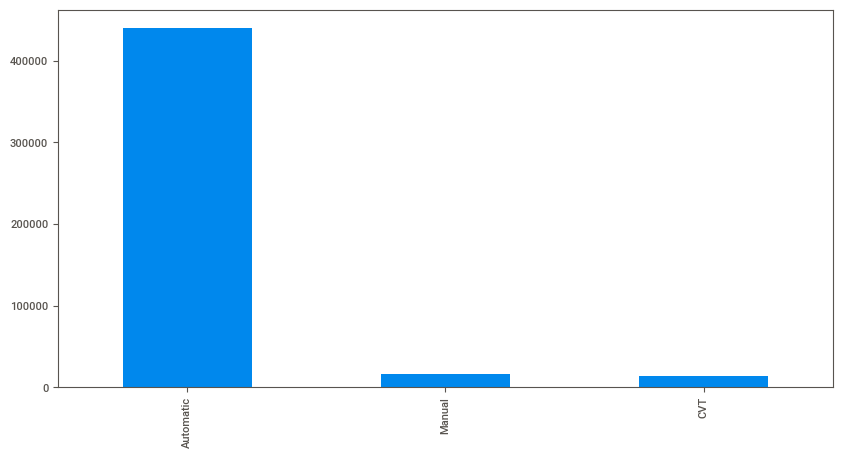

In [40]:
data.TRANSMISSIONTYPE.value_counts().plot(kind='bar', figsize=(10,5))

In [41]:
#DRIVETRAINTYPE

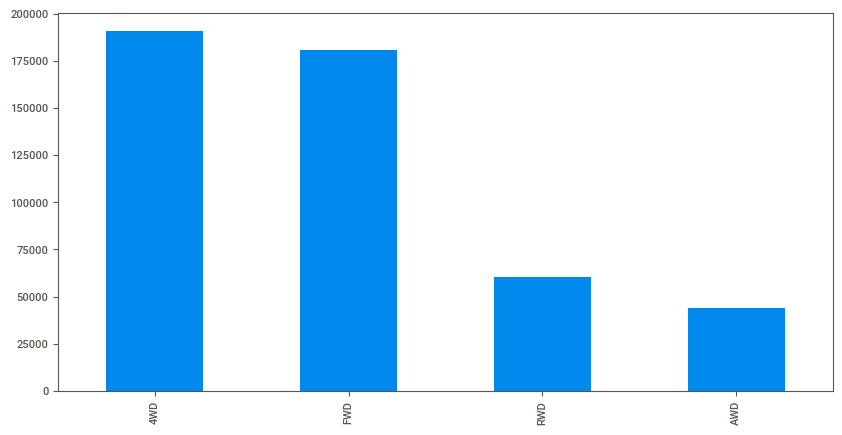

In [42]:
data.DRIVETRAINTYPE.value_counts().plot(kind='bar', figsize=(10,5))

In [43]:
#EXTERIORBASECOLOR

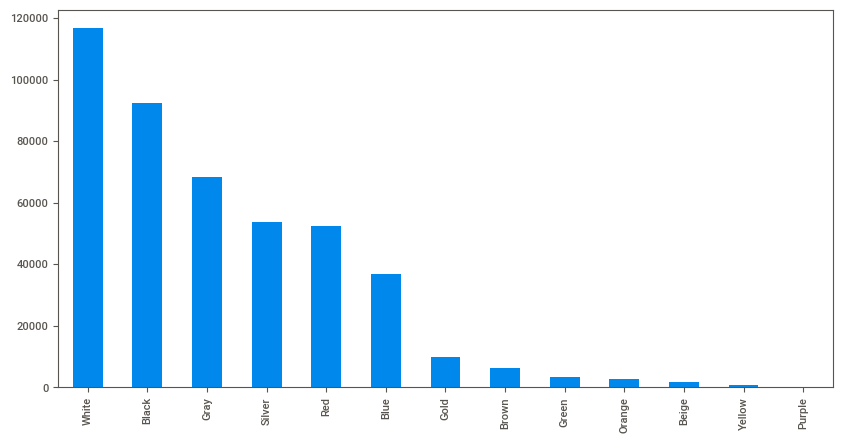

In [44]:
data.EXTERIORBASECOLOR.value_counts().plot(kind='bar', figsize=(10,5))

In [45]:
data.EXTERIORBASECOLOR.nunique()

13

In [46]:
#INTERIORMATERIAL

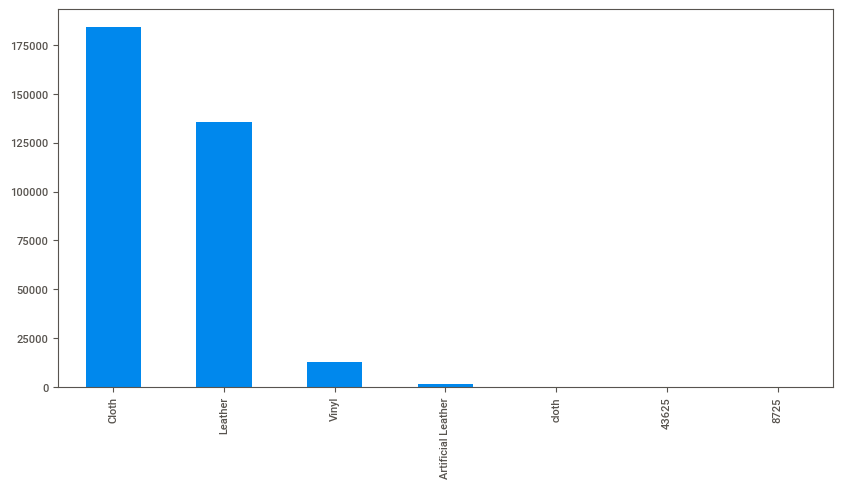

In [47]:
data.INTERIORMATERIAL.value_counts().plot(kind='bar', figsize=(10,5))

In [48]:
data.INTERIORMATERIAL.value_counts()

Cloth                 184114
Leather               135521
Vinyl                  12633
Artificial Leather      1202
cloth                     14
43625                      1
8725                       1
Name: INTERIORMATERIAL, dtype: int64

In [49]:
#BODYTYPE                

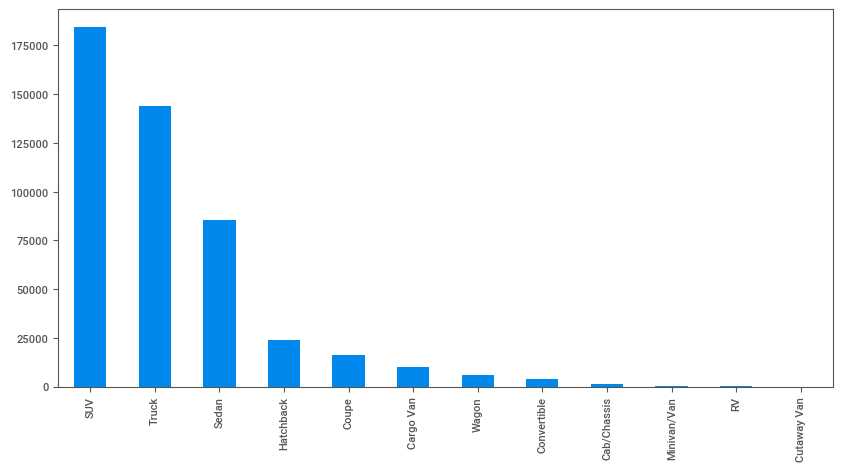

In [50]:
data.BODYTYPE.value_counts().plot(kind='bar', figsize=(10,5))

Most vehicles types sold were SUV's followed by Trucks

In [51]:
data.BODYTYPE.value_counts()

SUV            184475
Truck          144143
Sedan           85608
Hatchback       23796
Coupe           16396
Cargo Van        9773
Wagon            5936
Convertible      4036
Cab/Chassis      1199
Minivan/Van       243
RV                 17
Cutaway Van         1
Name: BODYTYPE, dtype: int64

In [52]:
#BODYCABSTYLE            

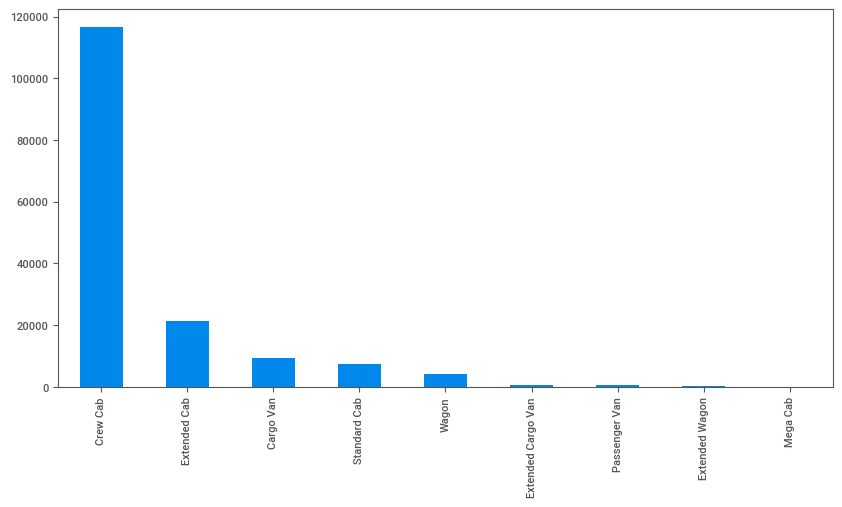

In [53]:
data.BODYCABSTYLE.value_counts().plot(kind='bar', figsize=(10,5))

In [54]:
data.BODYCABSTYLE.value_counts()

Crew Cab              116521
Extended Cab           21459
Cargo Van               9343
Standard Cab            7277
Wagon                   4184
Extended Cargo Van       567
Passenger Van            566
Extended Wagon           414
Mega Cab                   2
Name: BODYCABSTYLE, dtype: int64

In [55]:
#ODOMETER               

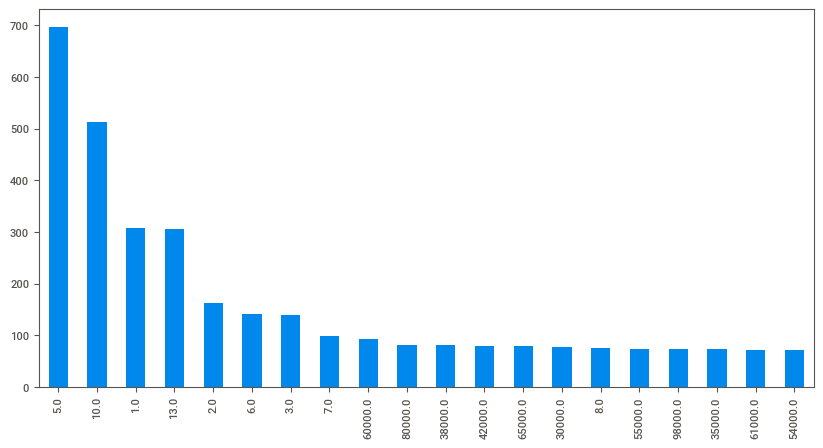

In [56]:
data.ODOMETER.value_counts().head(20).plot(kind='bar', figsize=(10,5))

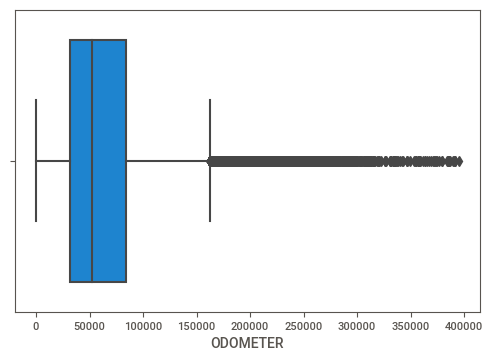

In [57]:
sns.boxplot(x=data.ODOMETER)

In [58]:
data.ODOMETER.nunique()

136362

In [59]:
#LISTPRICE              

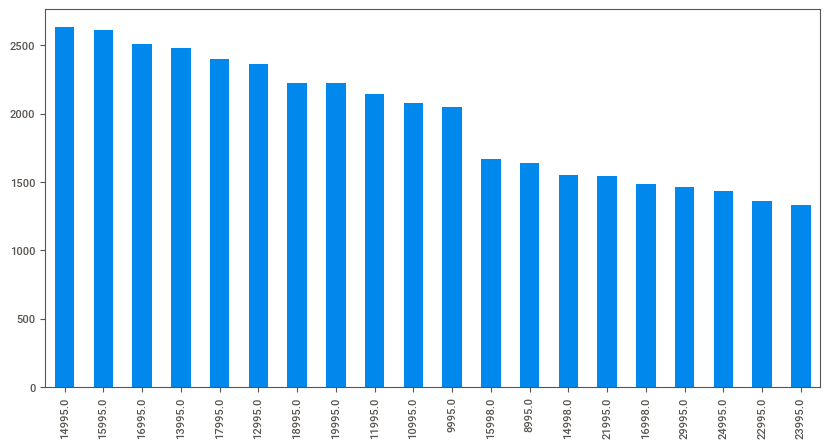

In [60]:
data.LISTPRICE.value_counts().head(20).plot(kind='bar', figsize=(10,5))

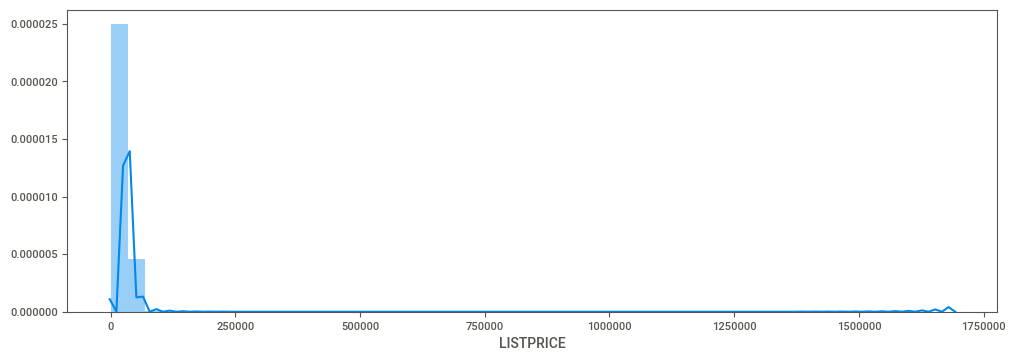

In [61]:
# Distribution of Listprice
fig = plt.figure()
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(data['LISTPRICE'])

In [62]:
data.LISTPRICE.nunique()

38717

In [63]:
data.LISTPRICE.unique()

array([29991., 25990.,  8900., ...,  8240., 10045.,  1500.])

Heatmap - Relationships

,POSTALCODE,MODELYEAR,ENGINEDISPLACEMENT,ENGINECYLINDERCOUNT,ODOMETER,LISTPRICE
POSTALCODE,1.000000,-0.013456,0.061110,0.046855,0.047920,0.039972
MODELYEAR,-0.013456,1.000000,-0.090510,-0.063622,-0.619416,0.391721
ENGINEDISPLACEMENT,0.061110,-0.090510,1.000000,0.942675,0.194986,0.581357
ENGINECYLINDERCOUNT,0.046855,-0.063622,0.942675,1.000000,0.152765,0.588803
ODOMETER,0.047920,-0.619416,0.194986,0.152765,1.000000,-0.302162
LISTPRICE,0.039972,0.391721,0.581357,0.588803,-0.302162,1.000000


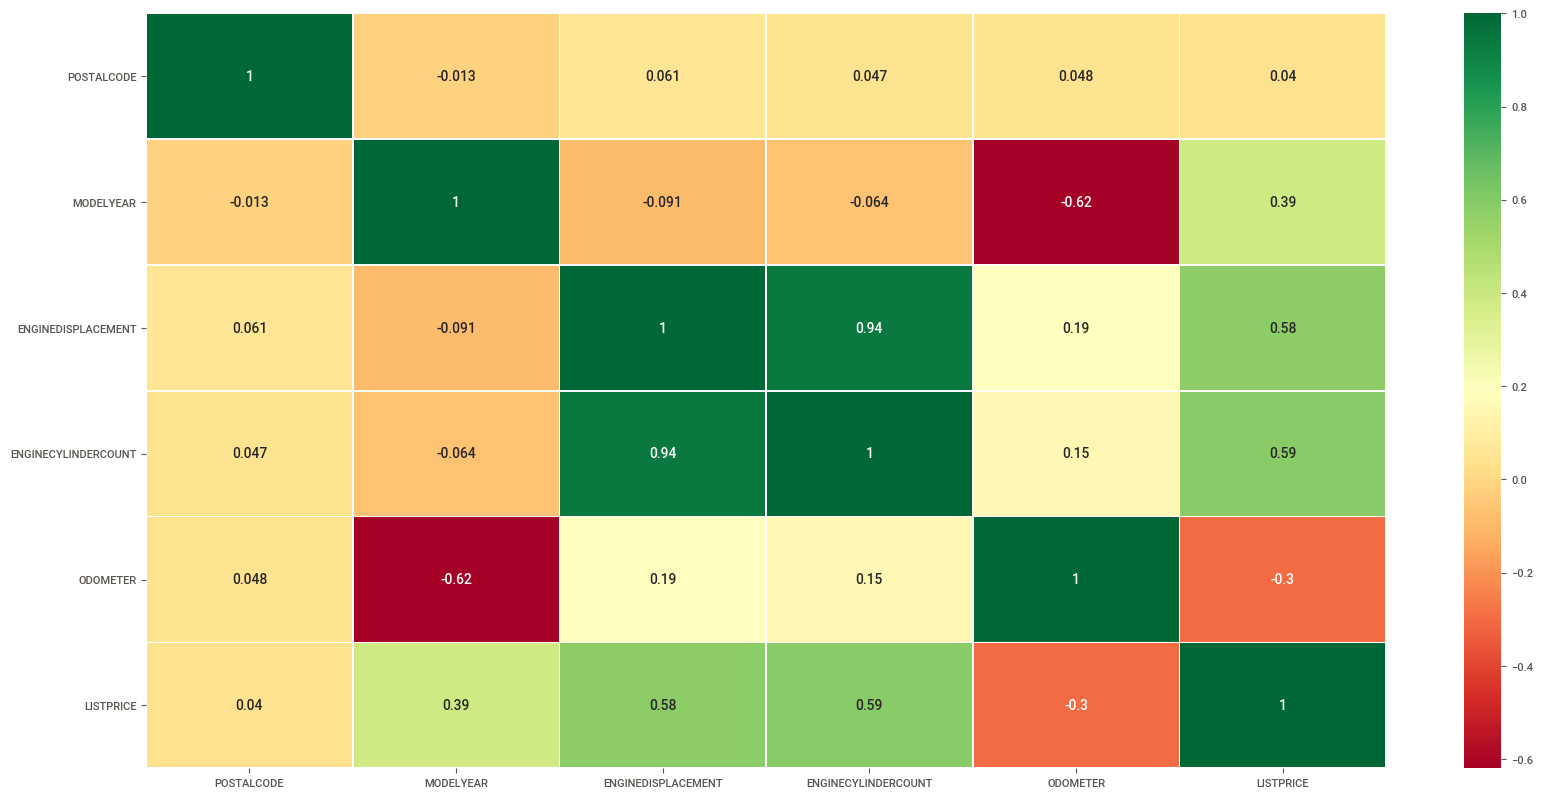

In [64]:
plt.figure(figsize=(20,10))
c = data.corr()
sns.heatmap(c, cmap="RdYlGn", annot=True, linewidths=.5)
c

As we can see from heatmap above there appears to be high correlation between:

- ENGINEDISPLACEMENT
- ENGINECYLINDERCOUNT

A decision will have to be made as to which of those we would like to keep.


## Feature Engineering

### Missing Data Treatment

In [65]:
# Function to calculate missing data and remove it if required
def missing_data_checker(df, col_name, drop=False, impute=False, impute_val="Unknown"):
    print("Total values:", len(df[col_name]))
    print("Missing values:", df[col_name].isna().sum())
    if drop:
        df.dropna(subset=[col_name],inplace=True)
        print("Dataset after missing data treatment:", len(df))
    if impute:
        df[col_name].fillna(impute_val, inplace=True)
        print("Dataset after imputation:", len(df))
        

In [66]:
#LISTPRICE

Given this will be our label we need to ensure this feature ia 100% complete, so we will drop any records that are missing

In [67]:
missing_data_checker(data, 'LISTPRICE', True, False)

Total values: 475673
Missing values: 44089
Dataset after missing data treatment: 431584


In [68]:
#ODOMETER

Given that only ~0.5% of this data is missing we will go ahead and drop missing records

In [69]:
missing_data_checker(data, 'ODOMETER', True, False)

Total values: 431584
Missing values: 2760
Dataset after missing data treatment: 428824


In [70]:
#BODYCABSTYLE

Given that ~65% of this data is missing there are 2 options:
- drop this entire column
- impute missing info with placeholder value

I decided to keep this field and impute missing data with placeholder "Unknown" value

In [71]:
missing_data_checker(data, 'BODYCABSTYLE', False, True, 'Unknown')

Total values: 428824
Missing values: 285646
Dataset after imputation: 428824


In [72]:
data.BODYCABSTYLE.value_counts()

Unknown               285646
Crew Cab              104334
Extended Cab           19009
Cargo Van               8351
Standard Cab            6331
Wagon                   3776
Passenger Van            516
Extended Cargo Van       476
Extended Wagon           383
Mega Cab                   2
Name: BODYCABSTYLE, dtype: int64

In [73]:
#INTERIORMATERIAL

Given that ~29% of this data is missing I will go ahead and impute with "Unknown" placeholder value

In [74]:
missing_data_checker(data, 'INTERIORMATERIAL', False, True, 'Unknown')

Total values: 428824
Missing values: 122318
Dataset after imputation: 428824


In [75]:
data.INTERIORMATERIAL.value_counts()

Cloth                 168152
Leather               126163
Unknown               122318
Vinyl                  11036
Artificial Leather      1139
cloth                     14
43625                      1
8725                       1
Name: INTERIORMATERIAL, dtype: int64

As we can see above there are some typos and numerical info so we will correct those

In [76]:
data.INTERIORMATERIAL.replace("cloth", "Cloth", inplace=True)
data.INTERIORMATERIAL.replace("43625", "Unknown", inplace=True)
data.INTERIORMATERIAL.replace("8725", "Unknown", inplace=True)

In [77]:
data.INTERIORMATERIAL.value_counts()

Cloth                 168166
Leather               126163
Unknown               122320
Vinyl                  11036
Artificial Leather      1139
Name: INTERIORMATERIAL, dtype: int64

In [78]:
#EXTERIORBASECOLOR

Given that ~6% of this data is missing I will go ahead and impute with "Unknown" placeholder value 

In [79]:
missing_data_checker(data, 'EXTERIORBASECOLOR', False, True, 'Unknown')

Total values: 428824
Missing values: 18884
Dataset after imputation: 428824


In [80]:
data.EXTERIORBASECOLOR.value_counts()

White      106727
Black       84900
Gray        63241
Silver      49696
Red         48178
Blue        33903
Unknown     18884
Gold         9301
Brown        5888
Green        2898
Orange       2497
Beige        1728
Yellow        892
Purple         91
Name: EXTERIORBASECOLOR, dtype: int64

In [81]:
#TRANSMISSIONTYPE

Given that ~1% of this data is missing I will go ahead and drop missing records

In [82]:
missing_data_checker(data, 'TRANSMISSIONTYPE', True, False)

Total values: 428824
Missing values: 4870
Dataset after missing data treatment: 423954


In [83]:
#TRIM

Given that ~3% of this data is missing I will go ahead and impute with "Unknown" placeholder value

In [84]:
missing_data_checker(data, 'TRIM', False, True, 'Unknown')

Total values: 423954
Missing values: 9811
Dataset after imputation: 423954


In [85]:
data.TRIM.value_counts().head(20)

SE                  109478
XLT                  93721
Titanium             33674
SEL                  30820
XL                   28927
Lariat               21751
Limited              20924
S                    12242
Base                  9847
Platinum              9826
Unknown               9811
Sport                 9479
King Ranch            4351
GT                    3316
V6                    3202
ST                    2740
FX4                   2607
GT Premium            2499
EcoBoost              2492
EcoBoost Premium      2298
Name: TRIM, dtype: int64

### Cardinality Treatment

In [86]:
def grouper(df, col, cutoff, replace_txt):
    count = df[col].value_counts()
    tmp_list = list(count[count > cutoff].keys())
    df[col] = df[col].map(lambda x: not_replace_value(x, replace_txt, tmp_list))

    return df

def not_replace_value(x, replace_val, lst):
    if x in lst:
        return x
    else:
        return replace_val

In [87]:
#TRIM

In [88]:
data.TRIM.nunique()

38

As we can see above this field suffers from relatively high cardinality.

It could be useful to bucket together values with lower frequency.

In [89]:
data = grouper(data, 'TRIM', 200, "Other")

In [90]:
data.TRIM.value_counts()

SE                  109478
XLT                  93721
Titanium             33674
SEL                  30820
XL                   28927
Lariat               21751
Limited              20924
S                    12242
Base                  9847
Platinum              9826
Unknown               9811
Sport                 9479
King Ranch            4351
GT                    3316
V6                    3202
ST                    2740
FX4                   2607
GT Premium            2499
EcoBoost              2492
EcoBoost Premium      2298
Raptor                2117
STX                   1566
SE Luxury             1313
Shelby GT350           770
SVT Raptor             765
SHO                    715
Commercial             570
V6 Premium             493
SES                    489
RS                     427
FX2                    324
Shelby GT500           208
Other                  192
Name: TRIM, dtype: int64

In [91]:
#MODEL

In [92]:
data.MODEL.nunique()

41

As we can see above this field suffers from relatively high cardinality.

It could be useful to bucket together values with lower frequency.


In [93]:
data = grouper(data, 'MODEL', 30, "Other")

In [94]:
data.MODEL.value_counts()

F-150                         101812
Escape                         66975
Explorer                       51613
Fusion                         38403
Edge                           30717
Focus                          28957
F-250SD                        15768
Mustang                        15730
F-350SD                         9406
Fiesta                          8846
Taurus                          7389
Expedition                      5620
Fusion Hybrid                   5524
Flex                            5230
Transit Connect                 4400
Transit-350                     3899
Expedition EL                   3421
EcoSport                        2795
C-Max Hybrid                    2588
Fusion Energi                   2385
Transit-250                     2284
Transit-150                     1985
C-Max Energi                    1876
E-350SD                         1147
F-550SD                          888
Expedition Max                   881
E-250                            794
F

In [95]:
#ENGINEDISPLACEMENT

Given that <0.1% of this data is missing I will go ahead and drop missing records

In [96]:
missing_data_checker(data, 'ENGINEDISPLACEMENT', True, False)

Total values: 423954
Missing values: 330
Dataset after missing data treatment: 423624


In [97]:
#ENGINECYLINDERCOUNT

Given that <0.1% of this data is missing I will go ahead and drop missing records

In [98]:
missing_data_checker(data, 'ENGINECYLINDERCOUNT', True, False)

Total values: 423624
Missing values: 8
Dataset after missing data treatment: 423616


In [99]:
#DRIVETRAINTYPE

Given that <0.1% of this data is missing I will go ahead and drop missing records

In [100]:
missing_data_checker(data, 'DRIVETRAINTYPE', True, False)

Total values: 423616
Missing values: 13
Dataset after missing data treatment: 423603


In [101]:
#BODYTYPE

In [102]:
missing_data_checker(data, 'BODYTYPE', True, False)

Total values: 423603
Missing values: 8
Dataset after missing data treatment: 423595


### Feature Correlation Treatment

In [103]:
#ENGINEDISPLACEMENT - ENGINECYLINDERCOUNT

After running model with this each feature I realised that ENGINECYLINDERCOUNT was not as significant as ENGINEDISPLACEMENT that it is highly correlated with. Model accuracy remained largely the same with both features so I decided to drop it.

In [104]:
data.drop(['ENGINECYLINDERCOUNT'], axis=1, inplace=True)
data.shape

(423595, 15)

## Predictive Model Creation

The ask of this exercise is to build a system identifying the attributes most important to include when pricing a given vehicle model. 

In order to do that I decided to use the available data and create a regression model. 

After that I will leverage feature importance and shap values to identify important attributes.

As far as modeling algorithms go there are many options but due to time limitation I will only try one.


Based on past experience Gradient Boosting algorithms tend to bring the best balance between performace and speed so that will be my focus here.

There are many GB options: XGBoost, AdaBoost, CatBoost, LightGBM and each have their own pros and cons.

In this scenario I will use Catboost as it provides high accuracy with short training times. 

In Addition to that, given that our dataset contains many categorical text features which Catboost can process will simplify feature engineering and speed up development.

drop static feature Make

In [105]:
data.drop(['MAKE'], axis=1, inplace=True)
data.shape

(423595, 14)

### Train - Test Split

In [106]:
y = data['LISTPRICE']
X = data.drop(columns=['LISTPRICE'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

print("X_Train shape:", X_train.shape)
print("y_Train shape:", y_train.shape)
print("X_Test shape:", X_test.shape)
print("y_Test shape:", y_test.shape)

X_Train shape: (338876, 13)
y_Train shape: (338876,)
X_Test shape: (84719, 13)
y_Test shape: (84719,)


### CatBoost Model

Specify categorical features

In [107]:
cat_feat_list = ['STATE', 'MODEL', 'TRIM', 'TRANSMISSIONTYPE', 'DRIVETRAINTYPE', 'EXTERIORBASECOLOR', 
                 'INTERIORMATERIAL', 'BODYTYPE', 'BODYCABSTYLE', 'POSTALCODE', 'MODELYEAR']

Create model and configure parameters

In [108]:
params = {'loss_function':'RMSE',
          'eval_metric':'RMSE',
          'cat_features': cat_feat_list,
          'verbose': 100,
          'random_seed': 42,
          'od_type': 'Iter',
          'od_wait': 10,
          'l2_leaf_reg': 5,
          'learning_rate': 0.1,
          'max_depth': 5
         }

cbc = CatBoostRegressor(**params)
cbc.fit(X_train, y_train,
        eval_set=(X_test, y_test),
        use_best_model=True,
        plot=True 
       );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 10851.9739222	test: 10426.6193785	best: 10426.6193785 (0)	total: 363ms	remaining: 6m 2s
100:	learn: 3361.2038466	test: 2957.9368116	best: 2957.9368116 (100)	total: 21.1s	remaining: 3m 7s
200:	learn: 3034.6968858	test: 2806.7146877	best: 2806.7146877 (200)	total: 42.1s	remaining: 2m 47s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 2762.719909
bestIteration = 283

Shrink model to first 284 iterations.


Calculate model metrics

In [111]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, cbc.predict(X_test))))
print("R-Square:", r2_score(y_test, cbc.predict(X_test)))

RMSE: 2762.7199084708864
R-Square: 0.9402929351764828


Feature Importance

In [112]:
feature_importance_df = cbc.get_feature_importance(prettified=True)
feature_importance_df

,Feature Id,Importances
0,MODEL,24.684541
1,ODOMETER,18.038604
2,MODELYEAR,13.764676
3,TRIM,13.240066
4,BODYCABSTYLE,9.908480
5,ENGINEDISPLACEMENT,7.935604
6,DRIVETRAINTYPE,6.530807
7,BODYTYPE,3.907930
8,INTERIORMATERIAL,0.576592
9,STATE,0.492175


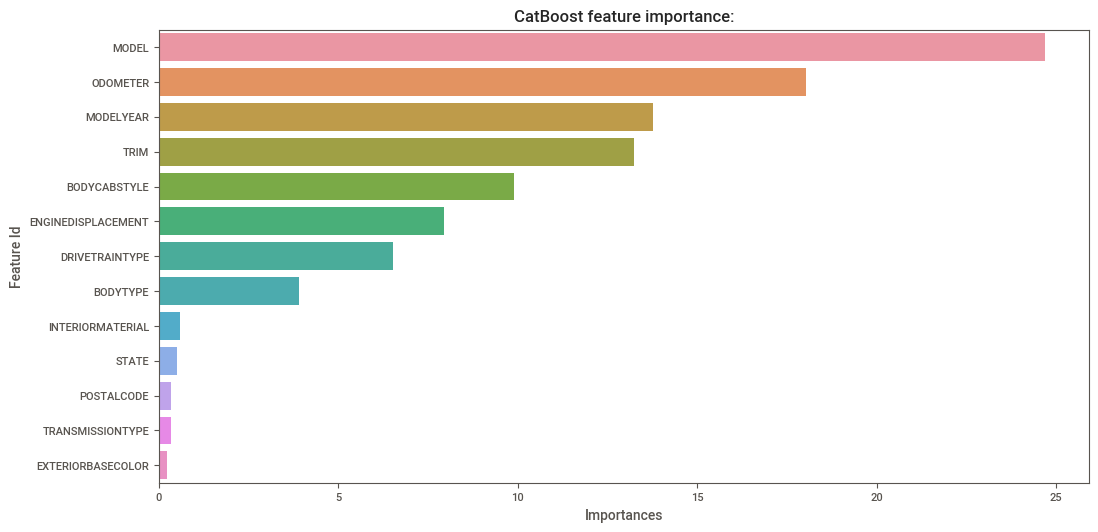

In [113]:
plt.figure(figsize=(12, 6));
sns.barplot(x="Importances", y="Feature Id", data=feature_importance_df);
plt.title('CatBoost feature importance:');

## Model Explainability - SHAP

Create Tree Explainer in order to help interpret model desicions

In [114]:
explainer = shap.TreeExplainer(cbc)
shap_values = explainer.shap_values(X)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:300,:], X_train.iloc[:300,:])

Global Interpretability

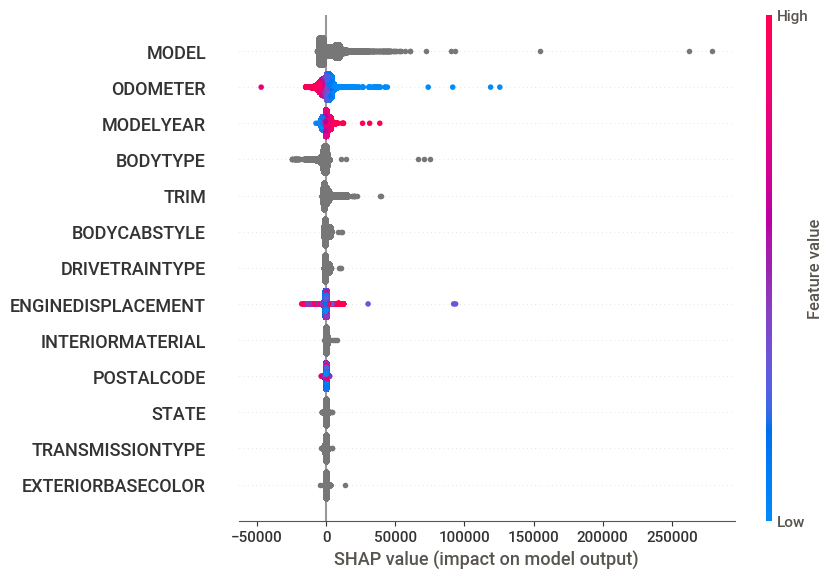

In [115]:
shap.summary_plot(shap_values, X)

Local Interpretability

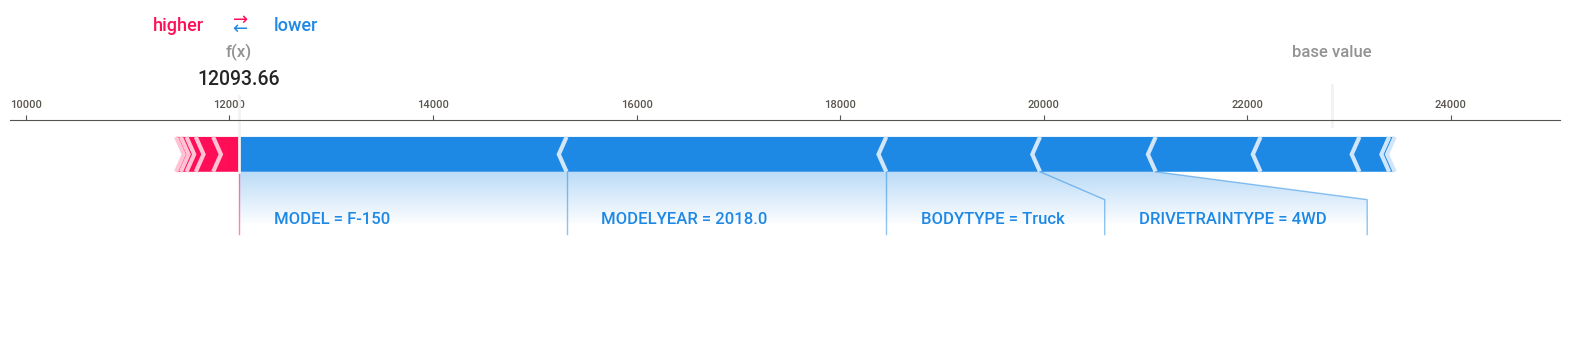

In [116]:
shap.force_plot(explainer.expected_value, shap_values[10,:], X_train.iloc[10,:], matplotlib=True)

In [117]:
X_train.iloc[10]

POSTALCODE                13619
STATE                        NY
MODELYEAR                  2018
MODEL                     F-150
TRIM                         XL
ENGINEDISPLACEMENT          2.7
TRANSMISSIONTYPE      Automatic
DRIVETRAINTYPE              4WD
EXTERIORBASECOLOR          Gray
INTERIORMATERIAL          Cloth
BODYTYPE                  Truck
BODYCABSTYLE           Crew Cab
ODOMETER                  25748
Name: 269108, dtype: object

In [118]:
y_train.iloc[10]

38548.0

In [126]:
cbc.predict(X_train.head(11))

array([ 8733.21193586, 10900.29755378, 63845.82690816, 42722.90618813,
       37253.44373288, 26920.88416074, 19225.94821843, 38495.38704558,
       17652.65710731, 30552.63802389, 36659.65454898])

Alternate solution to improve prediction accuracy could be to create 3 models, one for:
    - Trucks
    - SUVs
    - Sedans
since these vehicle types have different features and specs

## Questions?